# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html=browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
temperature_text = soup.find_all("tr",class_="data-row")


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
temperatures = []

# Loop through the scraped data to create a list of rows
for temperature in temperature_text:
    temperature_data = temperature.find_all("td")
    row = [col.text for col in temperature_data]
    temperatures.append(row)


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temperatures_df = pd.DataFrame(temperatures,columns=["id","terrestrial_date","sol","Is","month","min_temp","pressure"])


In [9]:
# Confirm DataFrame was created successfully
temperatures_df

,id,terrestrial_date,sol,Is,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
(temperatures_df.columns).astype
temperatures_df['terrestrial_date'] = temperatures_df['id'].astype(object)   
temperatures_df['id'] = temperatures_df['id'].astype(object) 
temperatures_df['sol'] = temperatures_df['sol'].astype(object)  
temperatures_df['Is'] = temperatures_df['Is'].astype(object)  
temperatures_df['month'] = temperatures_df['month'].astype(object) 
temperatures_df['min_temp'] = temperatures_df['min_temp'].astype(object)
temperatures_df['pressure'] = temperatures_df['pressure'].astype(object) 

# Check the updated data types
temperatures_df.dtypes

id                  object
terrestrial_date    object
sol                 object
Is                  object
month               object
min_temp            object
pressure            object
dtype: object

In [28]:
# Change data types for data analysis
 
temperatures_df['id'] = temperatures_df['id'].astype(object)  # Convert to integer
temperatures_df['terrestrial_date'] = pd.to_datetime(temperatures_df['terrestrial_date'])  # Convert to datetime, handle errors
temperatures_df['sol'] = temperatures_df['sol'].astype('int32')  # Convert to integer
temperatures_df['Is'] = temperatures_df['Is'].astype('int32')  # Convert to integer
temperatures_df['month'] = temperatures_df['month'].astype('int32')  # Convert to integer
temperatures_df['min_temp'] = temperatures_df['min_temp'].astype(float)  # Convert to float
temperatures_df['pressure'] = temperatures_df['pressure'].astype(float)  # Convert to float


In [29]:
# Confirm type changes were successful by examining data types again
temperatures_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
Is                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
# 1. How many months are there on Mars?
total_months_in_mars = temperatures_df['month'].nunique()
total_months_in_mars


12

In [31]:
# 2. How many sols (Martian days) worth of data are there?
sols_count = temperatures_df['sol'].count()
sols_count

1867

In [32]:
# 3. What is the average minimum temperature by month?
average_minimum_temperature_by_month = temperatures_df.groupby('month')['min_temp'].mean()
average_minimum_temperature_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

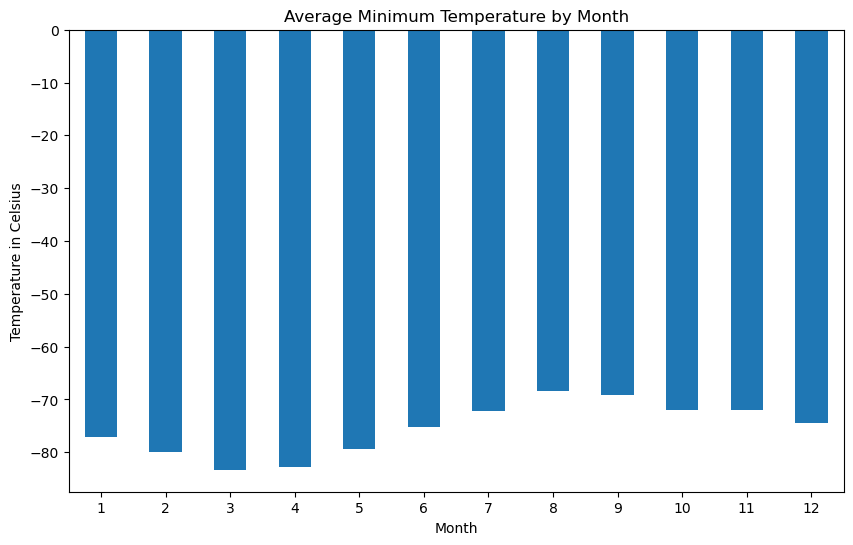

In [33]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
average_minimum_temperature_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better visibility
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Coldest Month: 3 with temperature -83.30729166666667 °C
Hottest Month: 8 with temperature -68.38297872340425 °C


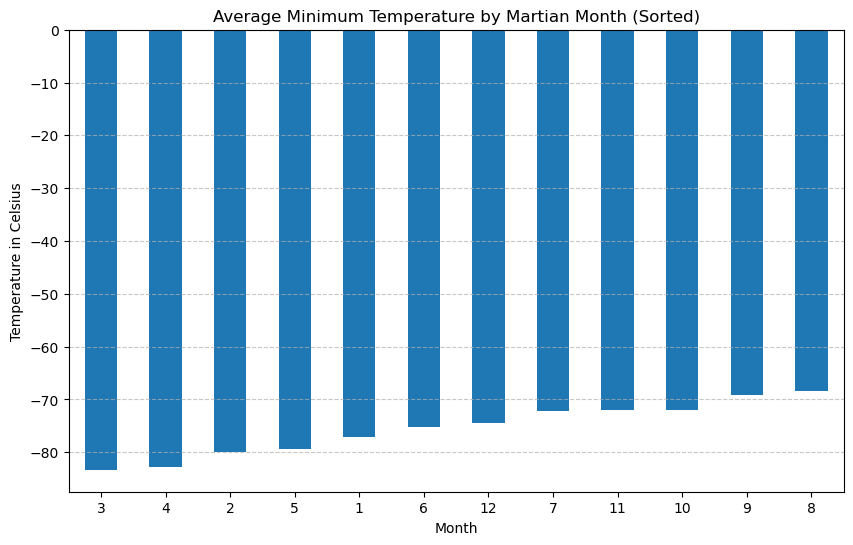

In [34]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_temp_by_month = average_minimum_temperature_by_month.sort_values()

# Plot the sorted result
plt.figure(figsize=(10, 6))
sorted_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Martian Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the coldest and hottest months in the graph
coldest_month = sorted_temp_by_month.idxmin()
hottest_month = sorted_temp_by_month.idxmax()

# Display the coldest and hottest months
print(f"Coldest Month: {coldest_month} with temperature {sorted_temp_by_month.min()} °C")
print(f"Hottest Month: {hottest_month} with temperature {sorted_temp_by_month.max()} °C")

plt.show()


In [35]:
# 4. What is the average pressure by month?
average_pressure_by_month = temperatures_df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

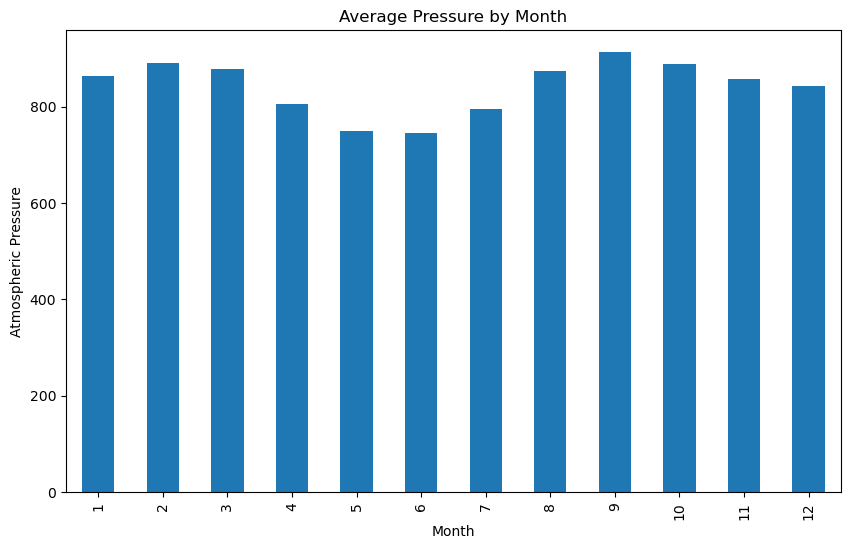

In [36]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()


Coldest Month: 3 with temperature -83.30729166666667 °C
Hottest Month: 8 with temperature -68.38297872340425 °C


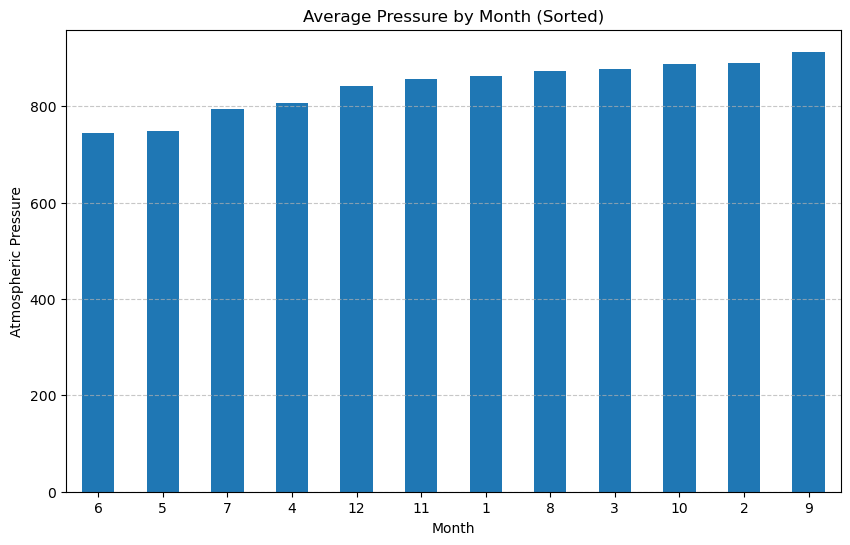

In [37]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_by_month = average_pressure_by_month.sort_values()

# Plot the sorted result
plt.figure(figsize=(10, 6))
sorted_pressure_by_month.plot(kind='bar')
plt.title('Average Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the coldest and hottest months in the graph
coldest_month = sorted_temp_by_month.idxmin()
hottest_month = sorted_temp_by_month.idxmax()

# Display the coldest and hottest months
print(f"Coldest Month: {coldest_month} with temperature {sorted_temp_by_month.min()} °C")
print(f"Hottest Month: {hottest_month} with temperature {sorted_temp_by_month.max()} °C")

plt.show()

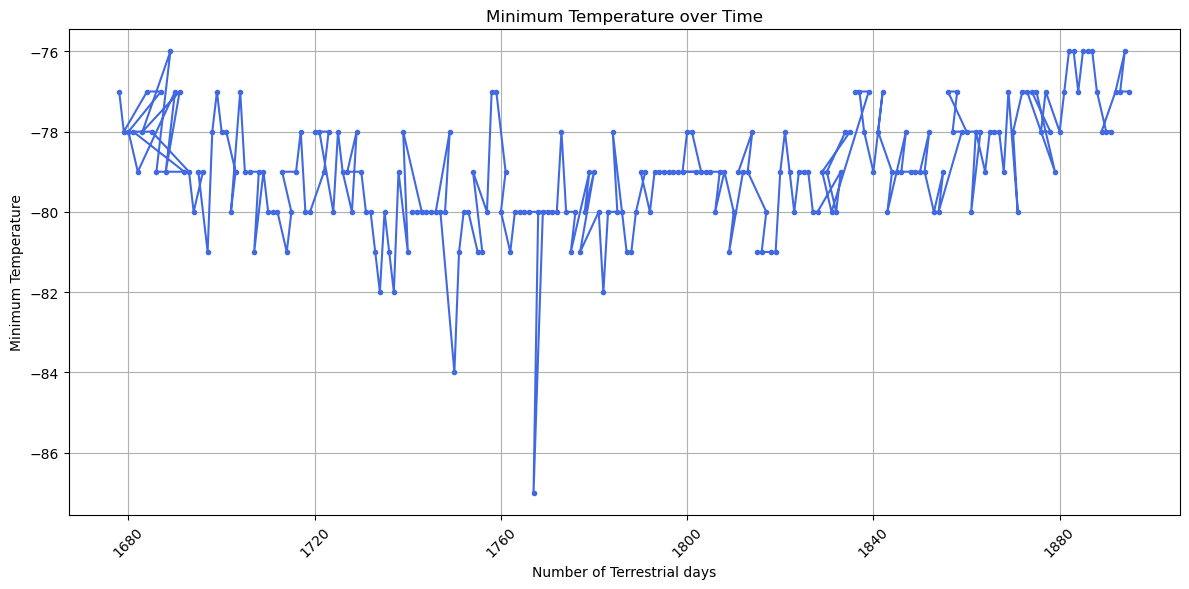

In [53]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 6))
plt.plot(temperatures_df['terrestrial_date'], temperatures_df['min_temp'], marker='o', color='royalblue', linestyle='-', markersize=3)
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial days')
plt.ylabel('Minimum Temperature')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()



#### Minimum Temperature

YOUR ANALYSIS HERE

In [40]:
minimum_temp= temperatures_df['min_temp'].min()
minimum_temp

-90.0

#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [45]:
Atmospheric_pressure = temperatures_df['pressure'].describe()
Atmospheric_pressure

count    1867.000000
mean      841.066417
std        54.253226
min       727.000000
25%       800.000000
50%       853.000000
75%       883.000000
max       925.000000
Name: pressure, dtype: float64

#### Year Length

YOUR ANALYSIS HERE

In [46]:
# Calculate the difference in days between the first and last date
start_date = temperatures_df['terrestrial_date'].min()
end_date = temperatures_df['terrestrial_date'].max()

# Calculate the length of the year in Earth days
year_length = (end_date - start_date).days

# # Display the result
year_length

79257

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
temperatures_df.to_csv('mars_data.csv', index=False)

In [ ]:
browser.quit()